# Homework #1   Due date: 27 October 2022, 11:59 PM

Kutay Özbay 270201017


## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear regression (you can use built-in LinearRegression() method). What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

In [37]:
# First we are importing needed libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [38]:
# We obtain Boston data
data = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

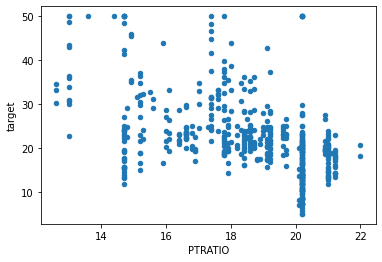

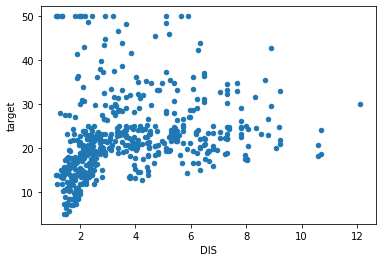

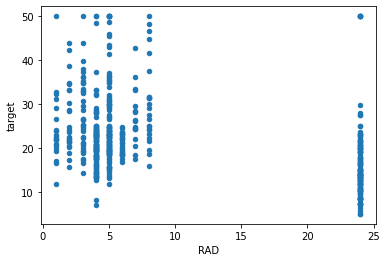

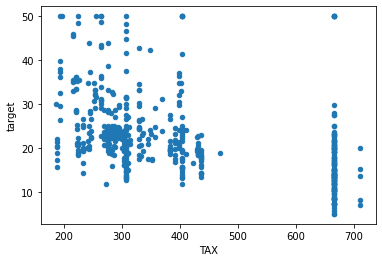

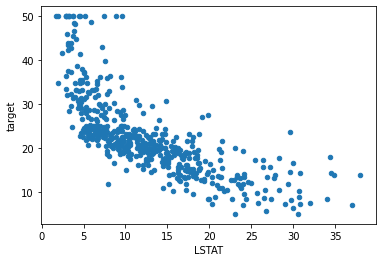

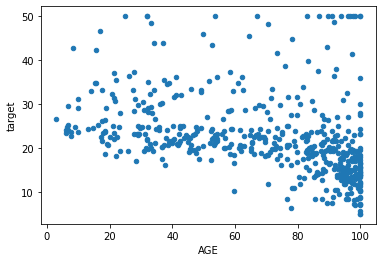

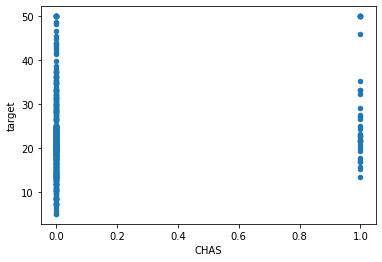

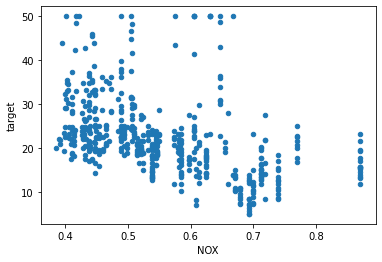

In [45]:
#Below code line assigns all data and the results of Boston dataset in 'housing_df'
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

#Finding best fit for one variable with checking every variable one by one with the target
housing_df.plot.scatter(x='PTRATIO',y='target')   #pupil-teacher ratio by town
housing_df.plot.scatter(x='DIS',y='target')  #weighted distances to five Boston employment centres
housing_df.plot.scatter(x='RAD',y='target')  #index of accessibility to radial highways
housing_df.plot.scatter(x='TAX',y='target')  #full-value property-tax rate per $10,000
housing_df.plot.scatter(x='LSTAT',y='target')  #% lower status of the population
housing_df.plot.scatter(x='AGE',y='target')   #proportion of owner-occupied units built prior to 1940
housing_df.plot.scatter(x='CHAS',y='target')  #Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
housing_df.plot.scatter(x='NOX',y='target')  #nitric oxides concentration (parts per 10 million) 
#LSTAT is selected

Score: 0.5441462975864797
Slope: [-0.95004935]
Intercept: 34.5538408793831
Equation of the line is:  y = -0.95x + 34.55


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


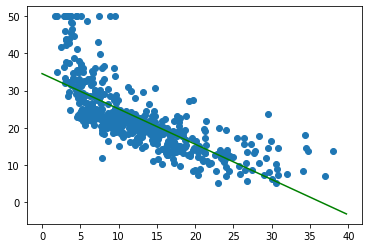

In [46]:


#Creating LinearRegression with built-in method 
lr = LinearRegression()

#Creating X and Y variables LSTAT is choosen for better result while using one factor in Linear Regression
X=housing_df[['LSTAT']]
Y=housing_df['target']

#Fitting is done below line
lr.fit(X,Y)

#Score of Linear Regression with one variable (LSTAT) 
print("Score: " +str (lr.score(X,Y)))

# y = mx + b   where m is the Slope and b is the Intercept 
print("Slope: " + str(lr.coef_)) #Slope of the line#Slope of the line
print("Intercept: " + str(lr.intercept_)) #Intercept of the line
print("Equation of the line is:  y = " + str(round(lr.coef_[0], 2)) + "x + " + str(round(lr.intercept_, 2)))

#Plotting
f = lambda x: lr.coef_[0] * x + lr.intercept_
steps = list(np.arange(0,40,.25))   # x-coordinate
fitline = list(map(f, steps))       # y-coordinate
pyplot.plot(steps, fitline, color='green')  #it just plots the line
pyplot.scatter(x=X,y=Y)    # puts the points


## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.

In [ ]:
#Below code line assigns all data and the results of Boston dataset in 'housing_df'
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
#Creating LinearRegression with built-in method 
lr = LinearRegression()
#Creating X and Y variables with all the values
X=housing_df[['CRIM',	'ZN',	'INDUS', 'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
Y=housing_df['target']

#Doing line fitting
lr.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [ ]:
#Getting score with build-in 'score' method
lr.score(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


0.7359206546199943

In [ ]:
#Doing the prediction and assigning to y_pred then calculating the mean sum of squared error
y_pred = lr.predict(X)
print("MSE: " + str(np.mean((y_pred - Y) ** 2)))


MSE: 21.894831181729202


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


## Q3) Splitting the dataset
In the lecture we did training and evaluation (score) on the whole Boston dataset. This is bad. Use the code in Week 1 Python Notebook to:
- shuffle the data,
- select 60% of the data as a training set (do the line fitting), 40% as a test set,
- what is the score on the test data?
- what is the mean squared error?

In [ ]:
#Shuffling while assigning the data 
housing_df = shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']),random_state = 1)

In [ ]:
#Splitting %60 training set to %40 test set
train_df = housing_df.iloc[0:303]
test_df = housing_df.iloc[303:506]

In [ ]:
#Linear Reg
lr = LinearRegression()

#Creating X_train and Y_train variables with all the values
X_train=train_df[['CRIM',	'ZN',	'INDUS', 'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
Y_train=train_df['target']

#Creating X_test and Y_test variables with all the values
X_test=test_df[['CRIM',	'ZN',	'INDUS', 'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
Y_test=test_df['target']

#Line fitting
lr.fit(X_train,Y_train)

#Doing the prediction
Y_predict = lr.predict(X_test)
print("Score of prediction: " + str(lr.score(X_test, Y_test)))
print("MSE: " + str(mean_squared_error(Y_test, Y_predict)))





Score of prediction: 0.6926431596048445
MSE: 25.592390976598235


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
